In [2]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#load dataset
df = pd.read_csv('PB_All_2000_2021.csv', sep=';')
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [5]:
# Missing values
df.isnull().sum()
df.dtypes

id             int64
date          object
NH4          float64
BSK5         float64
Suspended    float64
O2           float64
NO3          float64
NO2          float64
SO4          float64
PO4          float64
CL           float64
dtype: object

In [5]:
# Load the model and structure
model = joblib.load("Pollution_model.pkl")
model_cols = joblib.load("model_columns.pkl")

In [7]:
# Correlation heatmap of pollutants
import matplotlib.pyplot as plt 
Pollutants = ['O2', 'NO3', 'NO2', 'SO4','PO4','CL']

plt.figure(figsize=(10,6))

# compute correlation matrix for selected pollutants columns
corr = df[Pollutants].corr()

<Figure size 1000x600 with 0 Axes>

<Axes: >

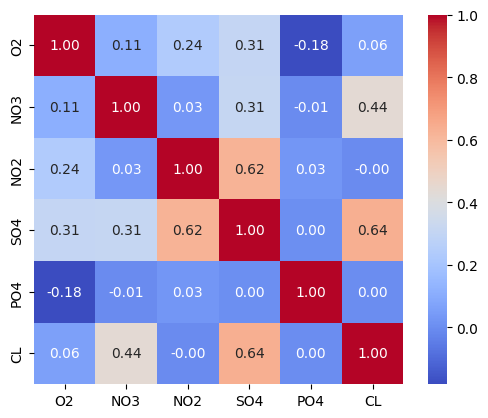

In [8]:
# plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)

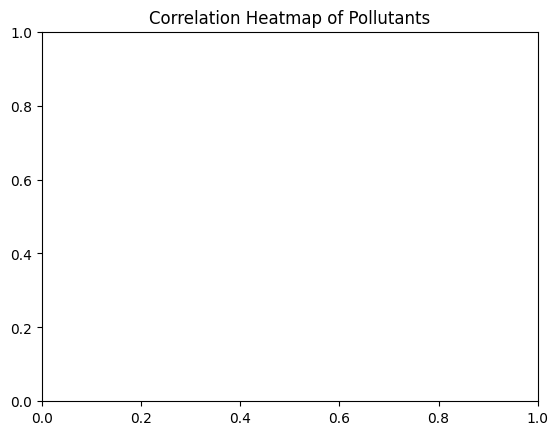

In [9]:
plt.title("Correlation Heatmap of Pollutants")
plt.show()

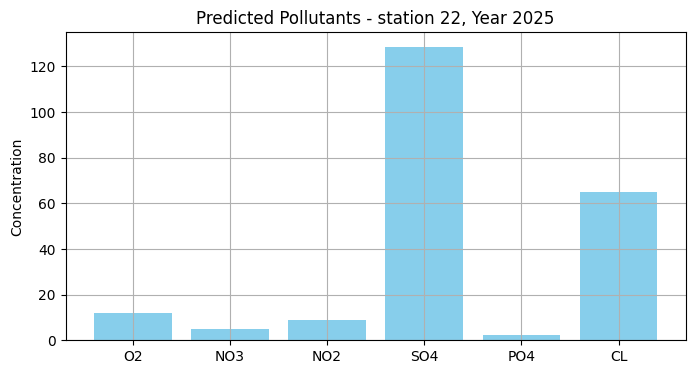

In [11]:
# Plot result
import matplotlib.pyplot as plt
pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
prediction = [12.14, 5.01, 9.04, 128.49, 2.49, 64.78]
year_input = 2025
station_input = 22
plt.figure(figsize=(8,4))
plt.bar(pollutants, prediction, color='skyblue')
plt.title(f"Predicted Pollutants - station {station_input}, Year {year_input}")
plt.ylabel("Concentration")
plt.grid(True)
plt.show()

In [6]:
# Let's create an user interface
print("Water Pollutants Predictor")
print("Predict the water pollutants based on Year and Station ID")

# User inputs
while True:
    try:
        year_input = int(input("Enter year(between 2000 and 2100):"))
        if 2000 <= year_input <= 2100:
            break
        else:
            print("Please enter ayear between 2000 and 2100.")
    except ValueError:
        print("Invalid input. Please enter a valid year .")


#for text input
station_id = input("Enter Station ID(default = '1'): ")    

# check if station_id is empty
if not station_id.strip():
    print("Please enter the station ID")
else:
    # Prepare the input DataFrame
    year_input = 2025
    station_id = 22
    input_df = pd.DataFrame({'year': [year_input], 'id': [station_id]})
    input_encoded = pd.get_dummies(input_df, columns=['id'])
    
    # Align with model columns
    model.cols = model.feature_names_in_
    for col in model_cols:
        if col not in input_encoded.columns:
            input_encoded[col] = 0

    input_encoded = input_encoded[model_cols]

    # Predict 
    predicted_pollutants = model.predict(input_encoded)[0]
    pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']

    # Display results
    print(f"\n Predicted pollutant levels for the station '{station_id}' in {year_input}:")
    for p, val in zip(pollutants, predicted_pollutants):
        print(f" - {p}:  {val:.2f}")


Water Pollutants Predictor
Predict the water pollutants based on Year and Station ID


Enter year(between 2000 and 2100): 2025
Enter Station ID(default = '1'):  22



 Predicted pollutant levels for the station '22' in 2025:
 - O2:  14.18
 - NO3:  5.01
 - NO2:  0.04
 - SO4:  128.49
 - PO4:  0.49
 - CL:  64.78
